# Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt
import gc


import warnings
warnings.filterwarnings('ignore')

# Reading dataset

In [2]:
df = pd.read_csv("training_set.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Missing values handling

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
df.isnull().sum()[0:60]

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType       872
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [7]:
df.isnull().sum()[60:]

GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

In [8]:
column_names = df.columns
list(column_names)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [9]:
for i in column_names:
    if df[i].dtypes == 'object':
        df[i].fillna(df[i].mode()[0],inplace=True)
    else:
        df[i].fillna(df[i].mean(),inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Outliers Handling

In [11]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,4,2010,WD,Normal,142125


In [12]:
cat = []
con = []
for i in df.columns:
    if df[i].dtypes=='object':
        cat.append(i)
    else:
        con.append(i)

In [13]:
con

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [14]:
len(con)

38

In [15]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [16]:
len(cat)

43

In [17]:
df[con]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [18]:
from scipy.stats import zscore

In [19]:
zscore(df[con])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,-1.730865,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273
1,-1.728492,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288
2,-1.726120,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154
3,-1.723747,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281
4,-1.721374,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.073375,-0.365633,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.574410,-0.973018,...,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439,-0.074560
1456,1.723747,-0.872563,0.679039,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084843,0.759659,...,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210,0.366161
1457,1.726120,0.309859,-0.183951,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.574410,-0.369871,...,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210,1.077611
1458,1.728492,-0.872563,-0.093110,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.574410,-0.865548,...,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210,-0.488523


In [20]:
zscore(df['LotFrontage'])

0      -0.229372
1       0.451936
2      -0.093110
3      -0.456474
4       0.633618
          ...   
1455   -0.365633
1456    0.679039
1457   -0.183951
1458   -0.093110
1459    0.224833
Name: LotFrontage, Length: 1460, dtype: float64

In [21]:
np.where(np.abs(zscore(df['LotFrontage'])>3))[0].tolist()

[171,
 197,
 231,
 277,
 313,
 446,
 807,
 909,
 934,
 1107,
 1127,
 1173,
 1182,
 1211,
 1298,
 1337]

In [22]:
out = []
for i in con:
    out = out + list(df[(zscore(df[i])>3)|(zscore(df[i])<-3)].index)
out

[9,
 48,
 93,
 125,
 165,
 246,
 291,
 300,
 312,
 335,
 411,
 488,
 520,
 535,
 635,
 637,
 703,
 705,
 713,
 861,
 969,
 985,
 1030,
 1062,
 1144,
 1186,
 1190,
 1266,
 1393,
 1416,
 171,
 197,
 231,
 277,
 313,
 446,
 807,
 909,
 934,
 1107,
 1127,
 1173,
 1182,
 1211,
 1298,
 1337,
 53,
 249,
 313,
 335,
 384,
 451,
 457,
 661,
 706,
 769,
 848,
 1298,
 1396,
 375,
 533,
 88,
 185,
 191,
 218,
 241,
 250,
 304,
 375,
 378,
 398,
 461,
 508,
 519,
 583,
 676,
 703,
 726,
 745,
 980,
 991,
 1123,
 1149,
 1213,
 1268,
 1327,
 1352,
 1435,
 1457,
 304,
 630,
 747,
 1132,
 1137,
 1349,
 37,
 58,
 70,
 105,
 115,
 161,
 169,
 178,
 224,
 297,
 349,
 403,
 477,
 517,
 523,
 654,
 691,
 718,
 755,
 763,
 798,
 808,
 825,
 898,
 981,
 1111,
 1169,
 1228,
 1289,
 1298,
 1373,
 1417,
 70,
 178,
 523,
 898,
 1182,
 1298,
 24,
 52,
 113,
 116,
 153,
 166,
 233,
 253,
 260,
 263,
 271,
 273,
 313,
 322,
 355,
 414,
 440,
 446,
 470,
 493,
 542,
 548,
 577,
 586,
 599,
 666,
 697,
 764,
 785,
 82

In [23]:
outliers = np.unique(out)
outliers

array([   1,    3,    5,    7,    8,    9,   17,   24,   26,   28,   33,
         37,   39,   41,   46,   48,   50,   51,   52,   53,   55,   58,
         64,   70,   72,   74,   78,   80,   88,   93,  102,  104,  105,
        113,  115,  116,  118,  120,  125,  129,  137,  144,  153,  154,
        159,  161,  165,  166,  169,  170,  171,  176,  178,  182,  185,
        187,  188,  189,  191,  196,  197,  198,  201,  205,  213,  215,
        218,  224,  231,  233,  237,  241,  245,  246,  249,  250,  251,
        253,  258,  260,  263,  267,  271,  273,  277,  278,  280,  289,
        291,  293,  297,  298,  299,  300,  304,  306,  309,  312,  313,
        314,  322,  325,  326,  328,  330,  332,  335,  339,  342,  343,
        346,  349,  351,  352,  355,  357,  358,  359,  360,  365,  366,
        367,  375,  378,  380,  384,  389,  398,  400,  403,  406,  411,
        414,  420,  421,  426,  440,  441,  446,  451,  454,  457,  459,
        461,  462,  470,  471,  473,  475,  477,  4

In [24]:
len(outliers)

445

In [25]:
# Remove the outliers from the dataset
df.drop(outliers,axis=0,inplace=True)

In [26]:
df[0:60]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
2,3,60,RL,68.000000,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
4,5,60,RL,84.000000,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000
6,7,20,RL,75.000000,10084,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,8,2007,WD,Normal,307000
10,11,20,RL,70.000000,11200,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,129500
11,12,60,RL,85.000000,11924,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,7,2006,New,Partial,345000
12,13,20,RL,70.049958,12968,Pave,Grvl,IR2,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,144000
13,14,20,RL,91.000000,10652,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,8,2007,New,Partial,279500
14,15,20,RL,70.049958,10920,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,GdWo,Shed,0,5,2008,WD,Normal,157000
15,16,45,RM,51.000000,6120,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,GdPrv,Shed,0,7,2007,WD,Normal,132000


In [27]:
df.shape

(1015, 81)

In [28]:
# Reinitialize the index
df.index = range(0,1015,1)

In [29]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
2,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000
3,7,20,RL,75.0,10084,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,8,2007,WD,Normal,307000
4,11,20,RL,70.0,11200,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,129500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,1453,180,RM,35.0,3675,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2006,WD,Normal,145000
1011,1454,20,RL,90.0,17217,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,7,2006,WD,Abnorml,84500
1012,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,10,2009,WD,Normal,185000
1013,1456,60,RL,62.0,7917,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,8,2007,WD,Normal,175000


# EDA

 select best con and best cat column

In [30]:
df.corr()['SalePrice'].sort_values()

ValueError: could not convert string to float: 'RL'

In [31]:
Q = pd.DataFrame(df.corr()['SalePrice'].sort_values())
imp_con_columns = Q[(Q['SalePrice']>0.2)|(Q['SalePrice']<-0.2)].index.tolist()
imp_con_columns.remove('SalePrice')

ValueError: could not convert string to float: 'RL'

In [32]:
imp_con_columns

NameError: name 'imp_con_columns' is not defined

Following are the columns and their correlation coefficients with the column "SalePrice" (in descending order):


<Axes: >

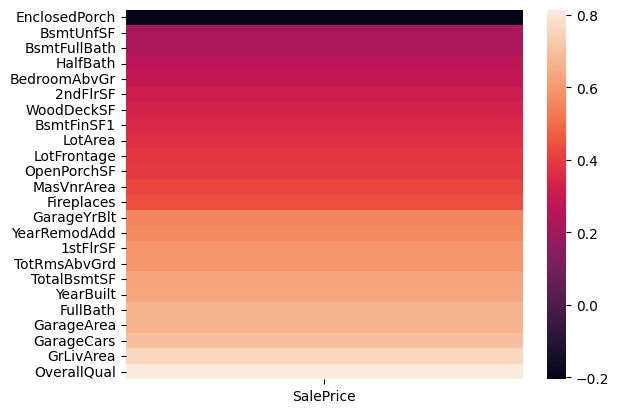

In [33]:

num_corr = df.select_dtypes('number').corr()
sale_corr = num_corr[(num_corr>=0.2) | (num_corr<= -0.2)]
sale_corr = sale_corr[['SalePrice']].fillna(0).sort_values(by='SalePrice')
del num_corr
gc.collect()

# drop the SalePrice from the correlation dataframe
sale_corr = sale_corr[sale_corr.SalePrice != 0].drop('SalePrice', axis=0)

print('Following are the columns and their correlation coefficients with the column "SalePrice" (in descending order):')
sns.heatmap(sale_corr)


In [34]:
corr_matrix = df[imp_con_columns].corr()
corr_matrix

NameError: name 'imp_con_columns' is not defined

In [35]:
# Correlatioin heatmap

plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=corr_matrix.values, cmap="Blues", fmt=".2f")
plt.show()

NameError: name 'corr_matrix' is not defined

<Figure size 2000x1500 with 0 Axes>

In [36]:
len(cat)

43

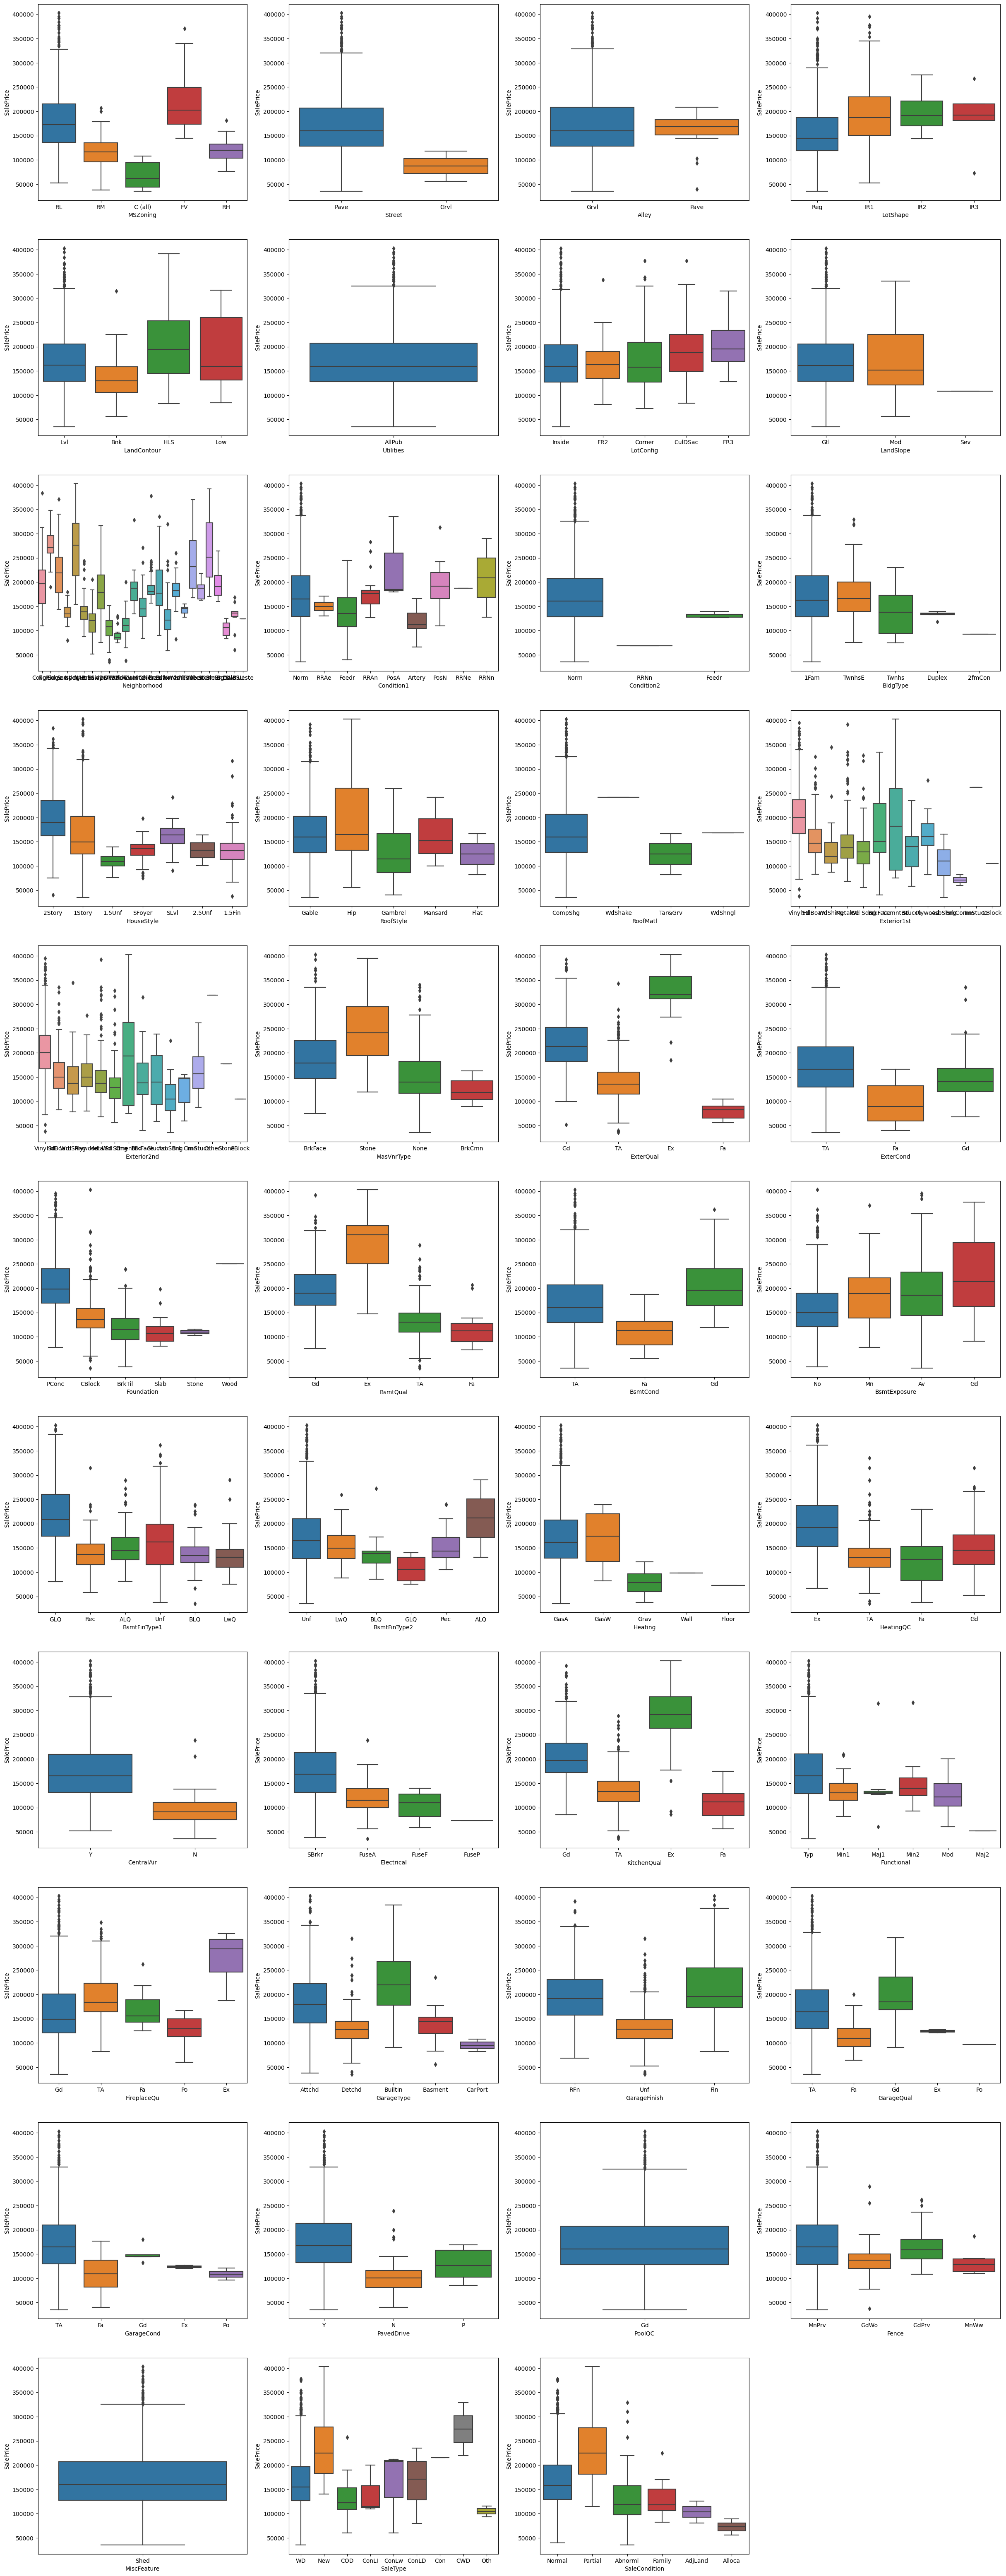

In [37]:
plt.figure(figsize=(30,80))
x = 1
for i in cat:
    plt.subplot(11,4,x)    # 11 rows and 4 columns
    sns.boxplot(x = df[i],y = df['SalePrice'])
    x = x+1

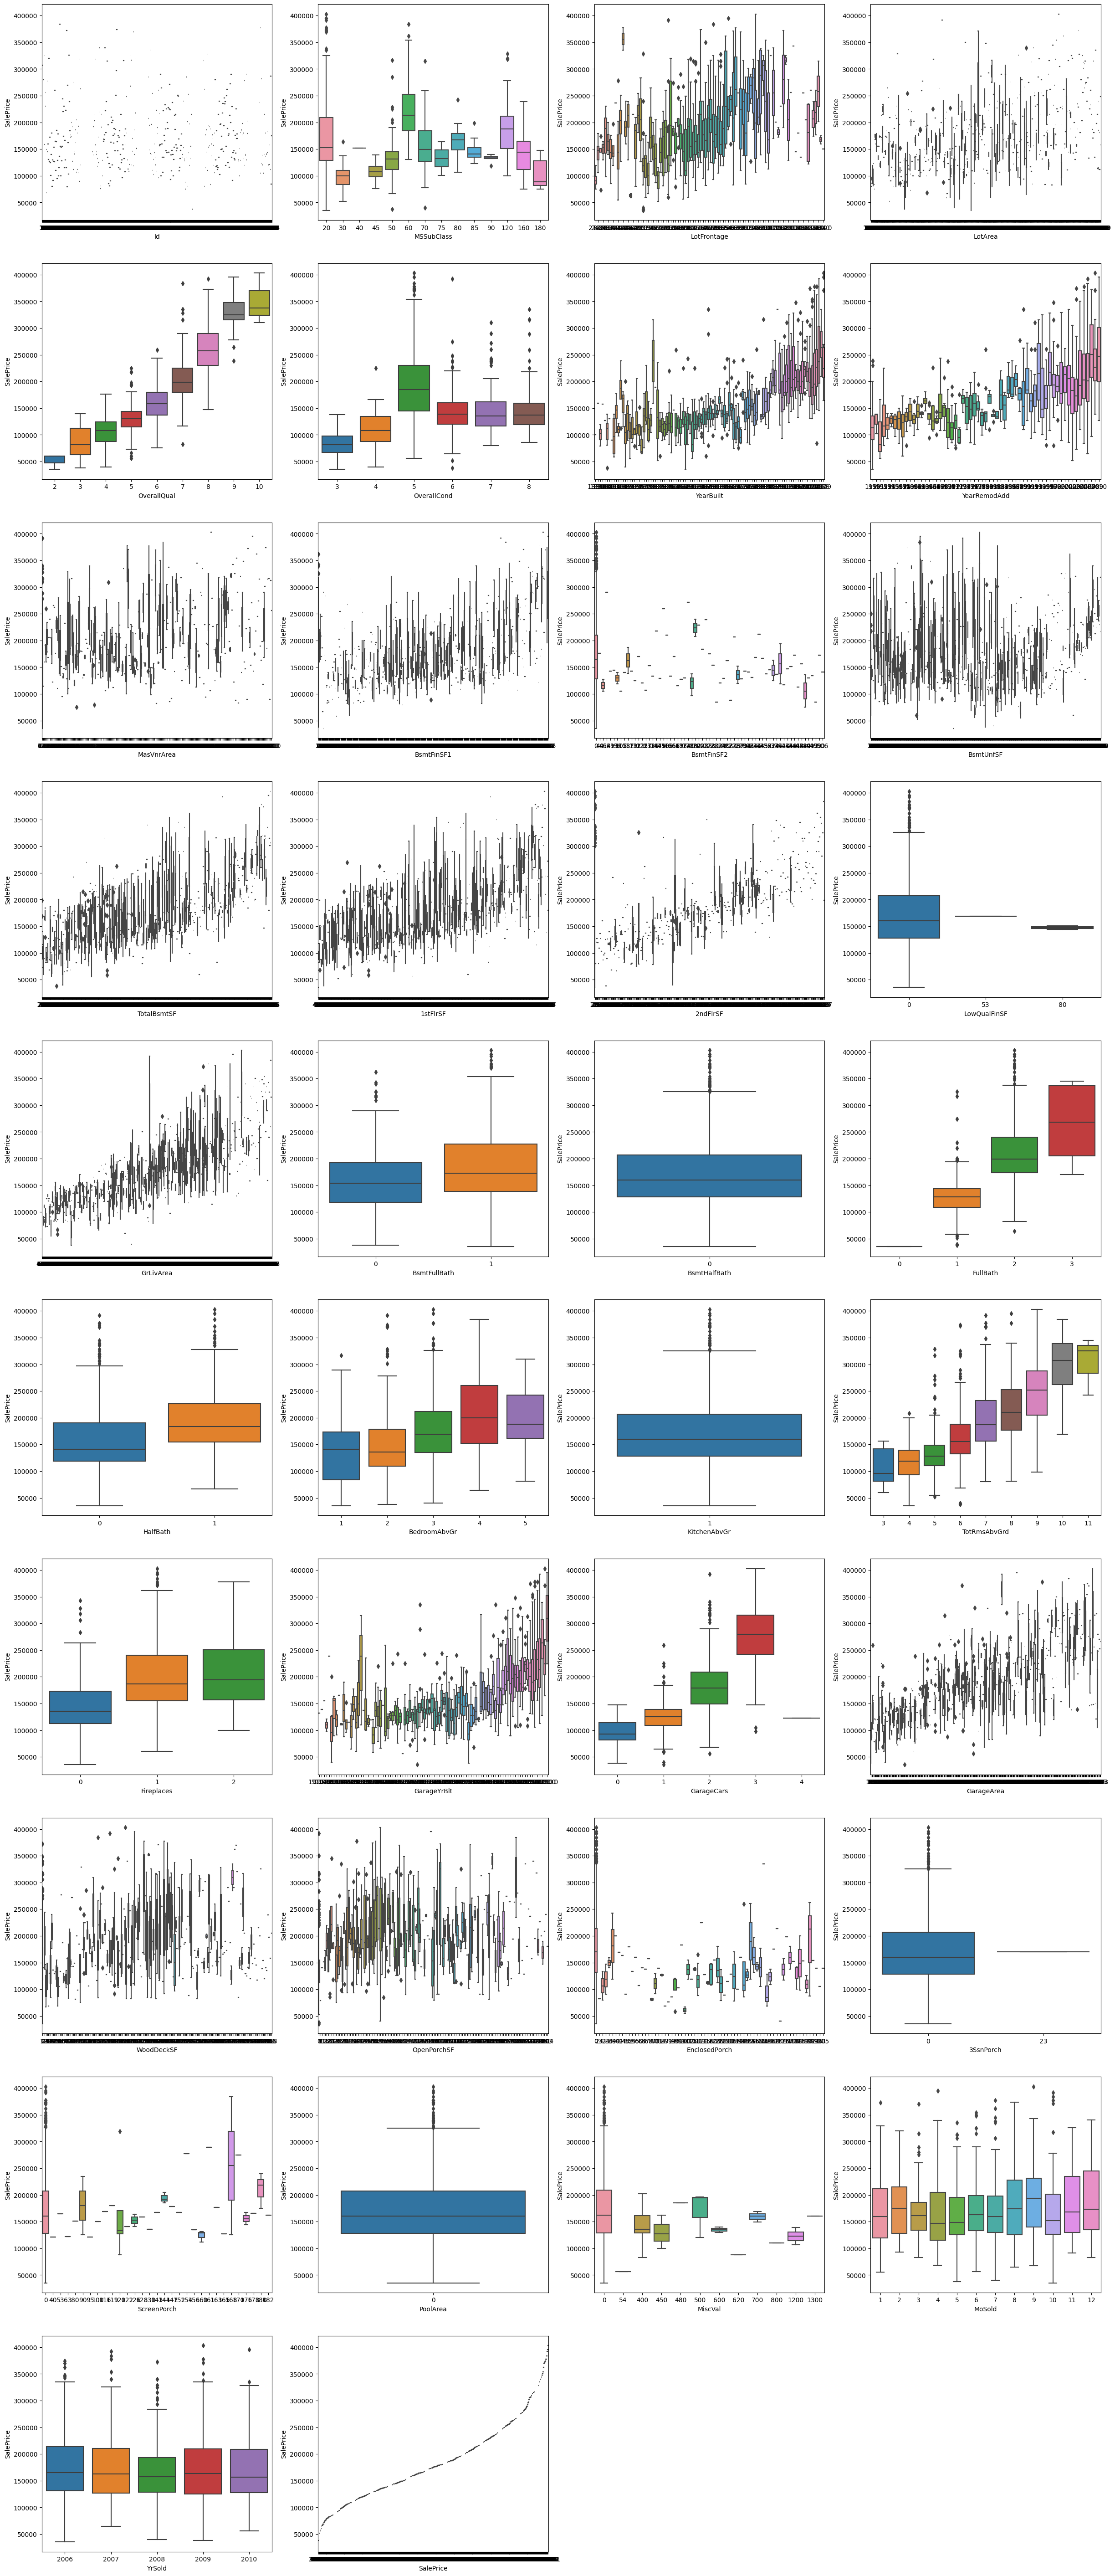

In [38]:
plt.figure(figsize=(30,80))
x = 1
for i in con:
    plt.subplot(11,4,x)    # 11 rows and 4 columns
    sns.boxplot(x = df[i],y = df['SalePrice'])
    x = x+1

I will consider all the categorical columns

# Preprocessing

In [39]:
X = df.drop(['SalePrice','Id'],axis=1)
Y = df['SalePrice']

In [40]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal
1,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal
2,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,0,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal
3,20,RL,75.0,10084,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,Gd,MnPrv,Shed,0,8,2007,WD,Normal
4,20,RL,70.0,11200,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,180,RM,35.0,3675,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,Gd,MnPrv,Shed,0,5,2006,WD,Normal
1011,20,RL,90.0,17217,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,Gd,MnPrv,Shed,0,7,2006,WD,Abnorml
1012,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,Gd,MnPrv,Shed,0,10,2009,WD,Normal
1013,60,RL,62.0,7917,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,Gd,MnPrv,Shed,0,8,2007,WD,Normal


In [41]:
Y

0       208500
1       223500
2       250000
3       307000
4       129500
         ...  
1010    145000
1011     84500
1012    185000
1013    175000
1014    210000
Name: SalePrice, Length: 1015, dtype: int64

 X[imp_con_columns]

In [42]:
# Scaling of all the continuous columns >> Normalization
normal_scaler = MinMaxScaler()
array = normal_scaler.fit_transform(X[imp_con_columns])
X1 = pd.DataFrame(array,columns=imp_con_columns)
X1

,EnclosedPorch,BsmtUnfSF,BsmtFullBath,HalfBath,BedroomAbvGr,2ndFlrSF,WoodDeckSF,BsmtFinSF1,LotArea,LotFrontage,...,YearRemodAdd,1stFlrSF,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,FullBath,GarageArea,GarageCars,GrLivArea,OverallQual
0,0.0,0.080257,1.0,1.0,0.50,0.598458,0.000000,0.428919,0.249485,0.389381,...,0.883333,0.236292,0.625,0.396664,0.951613,0.666667,0.520418,0.50,0.500787,0.625
1,0.0,0.232210,1.0,1.0,0.50,0.606868,0.000000,0.295261,0.347186,0.415929,...,0.866667,0.272470,0.375,0.426321,0.935484,0.666667,0.577398,0.50,0.530709,0.625
2,0.0,0.262172,1.0,1.0,0.75,0.737912,0.410256,0.397934,0.452214,0.557522,...,0.833333,0.399661,0.750,0.530584,0.927419,0.666667,0.793922,0.75,0.692913,0.750
3,0.0,0.169609,1.0,0.0,0.50,0.000000,0.544872,0.831713,0.306501,0.477876,...,0.916667,0.710006,0.500,0.781279,0.959677,0.666667,0.603989,0.50,0.494488,0.750
4,0.0,0.071696,1.0,0.0,0.50,0.000000,0.000000,0.550425,0.345441,0.433628,...,0.250000,0.340305,0.250,0.481928,0.645161,0.333333,0.364672,0.25,0.237008,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,0.0,0.000000,1.0,0.0,0.25,0.000000,0.000000,0.332321,0.082871,0.123894,...,0.916667,0.358395,0.250,0.253475,0.967742,0.333333,0.498575,0.50,0.249606,0.375
1011,0.0,0.609952,0.0,0.0,0.50,0.000000,0.076923,0.000000,0.555393,0.610619,...,0.933333,0.396834,0.375,0.528267,0.975806,0.333333,0.000000,0.00,0.276378,0.375
1012,0.0,0.433922,1.0,0.0,0.25,0.000000,0.000000,0.249089,0.216337,0.362832,...,0.916667,0.442623,0.375,0.565802,0.959677,0.666667,0.379867,0.50,0.308268,0.625
1013,0.0,0.509898,0.0,1.0,0.50,0.486335,0.000000,0.000000,0.230887,0.362832,...,0.833333,0.291125,0.500,0.441613,0.919355,0.666667,0.436847,0.50,0.475984,0.500


In [43]:
# One hot encoding of categorical columns
X2 = pd.get_dummies(X[cat])
X2

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,0,0,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1011,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
1012,0,1,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1013,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [44]:
# join x1 and x2
Xnew = X1.join(X2)
Xnew

,EnclosedPorch,BsmtUnfSF,BsmtFullBath,HalfBath,BedroomAbvGr,2ndFlrSF,WoodDeckSF,BsmtFinSF1,LotArea,LotFrontage,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0.080257,1.0,1.0,0.50,0.598458,0.000000,0.428919,0.249485,0.389381,...,0,0,0,1,0,0,0,0,1,0
1,0.0,0.232210,1.0,1.0,0.50,0.606868,0.000000,0.295261,0.347186,0.415929,...,0,0,0,1,0,0,0,0,1,0
2,0.0,0.262172,1.0,1.0,0.75,0.737912,0.410256,0.397934,0.452214,0.557522,...,0,0,0,1,0,0,0,0,1,0
3,0.0,0.169609,1.0,0.0,0.50,0.000000,0.544872,0.831713,0.306501,0.477876,...,0,0,0,1,0,0,0,0,1,0
4,0.0,0.071696,1.0,0.0,0.50,0.000000,0.000000,0.550425,0.345441,0.433628,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,0.0,0.000000,1.0,0.0,0.25,0.000000,0.000000,0.332321,0.082871,0.123894,...,0,0,0,1,0,0,0,0,1,0
1011,0.0,0.609952,0.0,0.0,0.50,0.000000,0.076923,0.000000,0.555393,0.610619,...,0,0,0,1,1,0,0,0,0,0
1012,0.0,0.433922,1.0,0.0,0.25,0.000000,0.000000,0.249089,0.216337,0.362832,...,0,0,0,1,0,0,0,0,1,0
1013,0.0,0.509898,0.0,1.0,0.50,0.486335,0.000000,0.000000,0.230887,0.362832,...,0,0,0,1,0,0,0,0,1,0


# Splitting the dataset

In [45]:
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.25,random_state=21)

In [46]:
xtrain.shape

(761, 248)

# Feature selection

In [47]:
# OlS regression model
from statsmodels.api import OLS,add_constant

# ypred = m1x1 + m2x2 + m3x3 + ..... mnxn + c

xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     53.39
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          7.53e-275
Time:                        23:16:48   Log-Likelihood:                -8355.2
No. Observations:                 761   AIC:                         1.710e+04
Df Residuals:                     565   BIC:                         1.801e+04
Df Model:                         195                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4.368e+15   1.93e+16      0.227      0.821   -3.35e+16    4.22e+16
EnclosedPorch          2666.3473   3917.402      0.681      0.496   -5028.102    1.04e+04
BsmtUnfSF             -4.105e+04   3.59e+04     -1.144      0.253   -1.11e+05    2.94e+04
BsmtFullBath           1323.5427   2160.216      0.613      0.540   -2919.492    5566.577
HalfBath              -1276.1889   2477.070     -0.515      0.607   -6141.579    3589.201
BedroomAbvGr          -6653.5678   6932.991     -0.960      0.338   -2.03e+04    6964.016
2ndFlrSF              -2.841e+04   2.31e+05     -0.123      0.902   -4.83e+05    4.26e+05
WoodDeckSF             1.503e+04   3436.239      4.374      0.000    8281.363    2.18e+04
BsmtFinSF1            -5910.9180   3.11e+04     -0.190      0.849    -6.7e+04    5.51e+04
LotArea                2.851e+04   8859.236      3.218      0.001    1.11e+04    4.59e+04
LotFrontage           -5312.7744   6577.387     -0.808      0.420   -1.82e+04    7606.341
OpenPorchSF            8339.7158   3603.757      2.314      0.021    1261.319    1.54e+04
MasVnrArea            -5974.1434   5851.510     -1.021      0.308   -1.75e+04    5519.226
Fireplaces             2168.7134   3394.003      0.639      0.523   -4497.690    8835.117
GarageYrBlt           -8548.7167   6645.069     -1.286      0.199   -2.16e+04    4503.338
YearRemodAdd            1.48e+04   3725.686      3.972      0.000    7480.211    2.21e+04
1stFlrSF              -7.747e+04   2.87e+05     -0.270      0.787   -6.41e+05    4.86e+05
TotRmsAbvGrd          -4881.2073   8815.503     -0.554      0.580   -2.22e+04    1.24e+04
TotalBsmtSF            8.202e+04   4.26e+04      1.925      0.055   -1685.272    1.66e+05
YearBuilt              2.402e+04   1.14e+04      2.106      0.036    1619.774    4.64e+04
FullBath              -4308.2606   8151.224     -0.529      0.597   -2.03e+04    1.17e+04
GarageArea             2.502e+04   9813.501      2.549      0.011    5740.333    4.43e+04
GarageCars             8473.9629   1.01e+04      0.842      0.400   -1.13e+04    2.83e+04
GrLivArea              2.469e+05   4.12e+05      0.599      0.550   -5.63e+05    1.06e+06
OverallQual            5.439e+04   9062.526      6.002      0.000    3.66e+04    7.22e+04
MSZoning_C (all)       1.144e+15   5.05e+15      0.227      0.821   -8.77e+15    1.11e+16
MSZoning_FV            1.144e+15   5.05e+15      0.227      0.821   -8.77e+15    1.11e+16
MSZoning_RH            1.144e+15   5.05e+15      0.227      0.821   -8.77e+15    1.11e+16
MSZoning_RL            1.144e+15   5.05e+15      0.227      0.821   -8.77e+15    1.11e+16
MSZoning_RM            1.144e+15   5.05e+15      0.227      0.821   -8.77e+15    1.11e+16
Street_Grvl            6.005e+15   2.65e+16      0.227      0.821    -4.6e+16     5.8e+16
Street_Pave            

100 features

In [48]:
ols.pvalues.sort_values()

OverallQual        3.487200e-09
WoodDeckSF         1.451668e-05
YearRemodAdd       8.051686e-05
LotArea            1.362620e-03
GarageArea         1.106287e-02
                       ...     
Condition1_Norm    8.207927e-01
Condition1_PosN    8.207927e-01
Condition1_RRNn    8.207927e-01
BsmtFinSF1         8.492620e-01
2ndFlrSF           9.022428e-01
Length: 249, dtype: float64

In [49]:
ols.pvalues.sort_values().index

Index(['OverallQual', 'WoodDeckSF', 'YearRemodAdd', 'LotArea', 'GarageArea',
       'OpenPorchSF', 'YearBuilt', 'TotalBsmtSF', 'Functional_Maj2',
       'GarageYrBlt',
       ...
       'SaleCondition_Alloca', 'SaleType_New', 'SaleType_ConLw',
       'Condition1_Feedr', 'Condition1_RRAn', 'Condition1_Norm',
       'Condition1_PosN', 'Condition1_RRNn', 'BsmtFinSF1', '2ndFlrSF'],
      dtype='object', length=249)

In [50]:
ols.rsquared_adj

0.9307588890460066

In [51]:
rsq = round(ols.rsquared_adj,4)
col_to_drop = ols.pvalues.sort_values().index[-1]
rsq,col_to_drop

(0.9308, '2ndFlrSF')

In [52]:
Xnew = Xnew.drop(col_to_drop,axis=1)   

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.25,random_state=21)

xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()
rsq = round(ols.rsquared_adj,4)
col_to_drop = ols.pvalues.sort_values().index[-1]
rsq,col_to_drop

(0.9308, 'SaleType_ConLw')

In [53]:
r = []
for i in range(0,150,1):
    Xnew = Xnew.drop(col_to_drop,axis=1)
    xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.25,random_state=21)
    xconst = add_constant(xtrain,has_constant='add')
    ols = OLS(ytrain,xconst).fit()
    rsq = round(ols.rsquared_adj,4)
    col_to_drop = ols.pvalues.sort_values().index[-1]
    if col_to_drop == 'const':
        col_to_drop = ols.pvalues.sort_values().index[-2]
    r.append(rsq)

In [54]:
Xnew

,BsmtUnfSF,BedroomAbvGr,WoodDeckSF,LotArea,OpenPorchSF,GarageYrBlt,YearRemodAdd,1stFlrSF,TotalBsmtSF,YearBuilt,...,HeatingQC_Ex,KitchenQual_Ex,Functional_Typ,GarageCond_Fa,SaleType_CWD,SaleType_Oth,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
0,0.080257,0.50,0.000000,0.249485,0.250000,0.930000,0.883333,0.236292,0.396664,0.951613,...,1,0,1,0,0,0,0,0,0,1
1,0.232210,0.50,0.000000,0.347186,0.172131,0.910000,0.866667,0.272470,0.426321,0.935484,...,1,0,1,0,0,0,0,0,0,1
2,0.262172,0.75,0.410256,0.452214,0.344262,0.900000,0.833333,0.399661,0.530584,0.927419,...,1,0,1,0,0,0,0,0,0,1
3,0.169609,0.50,0.544872,0.306501,0.233607,0.940000,0.916667,0.710006,0.781279,0.959677,...,1,0,1,0,0,0,0,0,0,1
4,0.071696,0.50,0.000000,0.345441,0.000000,0.550000,0.250000,0.340305,0.481928,0.645161,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,0.000000,0.25,0.000000,0.082871,0.114754,0.950000,0.916667,0.358395,0.253475,0.967742,...,0,0,1,0,0,0,0,0,0,1
1011,0.609952,0.50,0.076923,0.555393,0.229508,0.685062,0.933333,0.396834,0.528267,0.975806,...,1,0,1,0,0,0,1,0,0,0
1012,0.433922,0.25,0.000000,0.216337,0.463115,0.940000,0.916667,0.442623,0.565802,0.959677,...,1,0,1,0,0,0,0,0,0,1
1013,0.509898,0.50,0.000000,0.230887,0.163934,0.890000,0.833333,0.291125,0.441613,0.919355,...,1,0,1,0,0,0,0,0,0,1


In [55]:
import pandas as pd

# Assuming 'data' is your DataFrame
correlation_matrix = Xnew.corr()
correlation_matrix

,BsmtUnfSF,BedroomAbvGr,WoodDeckSF,LotArea,OpenPorchSF,GarageYrBlt,YearRemodAdd,1stFlrSF,TotalBsmtSF,YearBuilt,...,HeatingQC_Ex,KitchenQual_Ex,Functional_Typ,GarageCond_Fa,SaleType_CWD,SaleType_Oth,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
BsmtUnfSF,1.000000,0.113418,0.008169,0.092942,0.153263,0.208366,0.231908,0.373797,0.460689,0.193959,...,0.246342,0.064683,0.076829,0.010247,-0.016458,0.024262,-0.031635,0.006053,0.011687,-0.181026
BedroomAbvGr,0.113418,1.000000,0.071164,0.397120,0.109158,-0.010247,0.019375,0.118041,0.070386,0.038113,...,0.024539,-0.005651,-0.051957,-0.015072,-0.018218,0.013608,-0.045160,-0.050044,0.004794,0.045092
WoodDeckSF,0.008169,0.071164,1.000000,0.155434,0.059974,0.249232,0.210206,0.219717,0.232283,0.252714,...,0.126958,0.117653,0.011962,-0.097929,-0.016268,-0.036397,-0.042063,-0.036397,-0.027523,0.031293
LotArea,0.092942,0.397120,0.155434,1.000000,0.094900,0.038983,0.028915,0.368256,0.281027,0.071720,...,0.062416,0.087167,-0.016195,-0.034518,-0.000216,0.010921,-0.082034,-0.022276,-0.005248,0.027750
OpenPorchSF,0.153263,0.109158,0.059974,0.094900,1.000000,0.309593,0.305762,0.172141,0.208302,0.306713,...,0.265696,0.120388,0.077898,-0.069859,-0.007952,-0.023366,-0.065929,-0.005036,-0.019001,-0.095232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleType_Oth,0.024262,0.013608,-0.036397,0.010921,-0.023366,-0.009969,-0.010803,-0.024358,-0.011644,0.008246,...,-0.048807,-0.010325,0.011038,-0.007061,-0.001974,1.000000,0.168489,-0.001974,-0.004651,-0.098026
SaleCondition_Abnorml,-0.031635,-0.045160,-0.042063,-0.082034,-0.065929,-0.104126,-0.149131,-0.090511,-0.080002,-0.117561,...,-0.048872,-0.025034,0.014284,-0.016128,0.078386,0.168489,1.000000,-0.011718,-0.027604,-0.581798
SaleCondition_Alloca,0.006053,-0.050044,-0.036397,-0.022276,-0.005036,-0.013213,-0.021522,-0.001638,-0.035637,-0.046841,...,-0.048807,-0.010325,0.011038,-0.007061,-0.001974,-0.001974,-0.011718,1.000000,-0.004651,-0.098026
SaleCondition_Family,0.011687,0.004794,-0.027523,-0.005248,-0.019001,-0.054709,-0.078702,-0.029283,-0.025170,-0.057421,...,-0.057628,-0.024323,-0.014664,-0.016633,-0.004651,-0.004651,-0.027604,-0.004651,1.000000,-0.230920


In [56]:
a = Xnew.columns
a

Index(['BsmtUnfSF', 'BedroomAbvGr', 'WoodDeckSF', 'LotArea', 'OpenPorchSF',
       'GarageYrBlt', 'YearRemodAdd', '1stFlrSF', 'TotalBsmtSF', 'YearBuilt',
       'GarageArea', 'GrLivArea', 'OverallQual', 'MSZoning_C (all)',
       'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low',
       'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_Inside',
       'LandSlope_Gtl', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_Timber',
       'Neighborhood_Veenker', '

In [57]:
len(Xnew.columns)

97

# Model training

In [58]:
lin_model = LinearRegression()
lin_model.fit(xtrain,ytrain)

LinearRegression()

# Model evaluation

In [59]:
# Testing data evaluation
ypredtest = lin_model.predict(xtest)
# ypredtest

Mean_absolute_error = mean_absolute_error(ytest,ypredtest)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytest,ypredtest)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytest,ypredtest)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtest) -1) / (len(xtest)-len(Xnew.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 14857.98195760572
Mean_squared_error: 460262669.79205596
R_squared: 0.89459023046315
Adj_R2: 0.8290469763280574


In [60]:
# Training data evaluation
ypredtrain = lin_model.predict(xtrain)
# ypredtest

Mean_absolute_error = mean_absolute_error(ytrain,ypredtrain)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytrain,ypredtrain)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytrain,ypredtrain)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtrain) -1) / (len(xtrain)-len(Xnew.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 10465.509573160067
Mean_squared_error: 220420716.4404689
R_squared: 0.9436481484729328
Adj_R2: 0.9354036091092441


# Build a regularization model

# Without hyperparameter tuning

# 1.Ridge regression

In [61]:
ridge_model = Ridge()   # alpha=1.0
ridge_model.fit(xtrain,ytrain)

Ridge()

In [62]:
# Testing data evaluation
ypredtest = ridge_model.predict(xtest)
# ypredtest

Mean_absolute_error = mean_absolute_error(ytest,ypredtest)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytest,ypredtest)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytest,ypredtest)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtest) -1) / (len(xtest)-len(Xnew.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 13877.62021368282
Mean_squared_error: 343656853.94782406
R_squared: 0.9212953990147296
Adj_R2: 0.8723572817354268


In [63]:

# Training data evaluation
ypredtrain = ridge_model.predict(xtrain)
# ypredtest

Mean_absolute_error = mean_absolute_error(ytrain,ypredtrain)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytrain,ypredtrain)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytrain,ypredtrain)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtrain) -1) / (len(xtrain)-len(Xnew.columns)-1))
print('Adj_R2:',Adj_R2)


Mean_absolute_error: 11015.312389041419
Mean_squared_error: 243516839.2459586
R_squared: 0.9377434889463525
Adj_R2: 0.9286350702854116


# 2.Lasso regression

In [64]:
lasso_model = Lasso()
lasso_model.fit(xtrain,ytrain)

Lasso()

In [65]:
# Testing data evaluation
ypredtest = lasso_model.predict(xtest)
# ypredtest

Mean_absolute_error = mean_absolute_error(ytest,ypredtest)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytest,ypredtest)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytest,ypredtest)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtest) -1) / (len(xtest)-len(Xnew.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 14731.968376301395
Mean_squared_error: 442658625.9732876
R_squared: 0.8986219243710903
Adj_R2: 0.8355855568326016


In [66]:
# Training data evaluation
ypredtrain = lasso_model.predict(xtrain)

Mean_absolute_error = mean_absolute_error(ytrain,ypredtrain)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytrain,ypredtrain)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytrain,ypredtrain)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtrain) -1) / (len(xtrain)-len(Xnew.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 10476.749710066068
Mean_squared_error: 220554191.3432419
R_squared: 0.9436140248296332
Adj_R2: 0.9353644930173775


# With hyperparameter tuning

# 1. Ridge with GridsearchCV

In [67]:
ridge_model = Ridge()

hyp_grid = {'alpha':np.arange(0.1,1,0.01)}

gscv_ridge_model = GridSearchCV(ridge_model,hyp_grid,cv = 5)

gscv_ridge_model.fit(xtrain,ytrain)

gscv_ridge_model.best_estimator_

Ridge(alpha=0.16999999999999998)

In [68]:
ridge_model = Ridge(alpha=0.1)  
ridge_model.fit(xtrain,ytrain)

Ridge(alpha=0.1)

In [69]:
# Testing data evaluation
ypredtest = ridge_model.predict(xtest)

Mean_absolute_error = mean_absolute_error(ytest,ypredtest)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytest,ypredtest)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytest,ypredtest)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtest) -1) / (len(xtest)-len(Xnew.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 14308.936371727359
Mean_squared_error: 389001665.05769527
R_squared: 0.9109104896955728
Adj_R2: 0.8555150890575636


In [70]:
# Training data evaluation
ypredtrain = ridge_model.predict(xtrain)

Mean_absolute_error = mean_absolute_error(ytrain,ypredtrain)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytrain,ypredtrain)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytrain,ypredtrain)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtrain) -1) / (len(xtrain)-len(Xnew.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 10539.522854526382
Mean_squared_error: 222698905.84962365
R_squared: 0.9430657159620127
Adj_R2: 0.9347359639986873


# 2. Lasso with GridsearchCV

In [71]:
lasso_model = Lasso()

hyp_grid = {'alpha':np.arange(0.1,1,0.01)}

gscv_lasso_model = GridSearchCV(lasso_model,hyp_grid,cv = 5)

gscv_lasso_model.fit(xtrain,ytrain)

gscv_lasso_model.best_estimator_

Lasso(alpha=0.9899999999999995)

In [72]:
lasso_model = Lasso(alpha=0.9899999999999995)
lasso_model.fit(xtrain,ytrain)

Lasso(alpha=0.9899999999999995)

In [73]:
# Testing data evaluation
ypredtest = lasso_model.predict(xtest)
# ypredtest

Mean_absolute_error = mean_absolute_error(ytest,ypredtest)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytest,ypredtest)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytest,ypredtest)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtest) -1) / (len(xtest)-len(Xnew.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 14733.228113514837
Mean_squared_error: 442828482.65330935
R_squared: 0.8985830236418536
Adj_R2: 0.8355224678294164


In [74]:
# Training data evaluation
ypredtrain = lasso_model.predict(xtrain)

Mean_absolute_error = mean_absolute_error(ytrain,ypredtrain)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytrain,ypredtrain)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytrain,ypredtrain)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtrain) -1) / (len(xtrain)-len(Xnew.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 10476.630830252336
Mean_squared_error: 220551535.63584793
R_squared: 0.9436147037768355
Adj_R2: 0.9353652712977301


# Final model

In [75]:
# Best performing model
ridge_model = Ridge()   # alpha=1.0
ridge_model.fit(Xnew,Y)

Ridge()

In [76]:
df1 = pd.read_csv('testing_set.csv')
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [77]:
df1.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [78]:
df1.isnull().sum()[0:60]

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
Alley           1352
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [79]:
df1.isnull().sum()[60:]

GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond         78
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1456
Fence            1169
MiscFeature      1408
MiscVal             0
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
dtype: int64

In [80]:
df1.isna().sum()[0:60]

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
Alley           1352
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [81]:
df.isna().sum()[60:]

GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC           0
Fence            0
MiscFeature      0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [82]:
df1['LotFrontage'].mean()

68.58035714285714

In [83]:
df1['MSZoning'].mode()[0]

'RL'

In [84]:
list(df1.columns)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [85]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [86]:
for i in df1.columns:
    if df1[i].dtypes == 'object':
        df1[i].fillna(df1[i].mode()[0],inplace=True)
    else:
        df1[i].fillna(df1[i].mean(),inplace=True)

In [87]:
df1.isna().sum()[:60]

Id              0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
Alley           0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional

In [88]:
df1.isna().sum()[60:]

GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC           0
Fence            0
MiscFeature      0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
dtype: int64

# Outliers handling

In [89]:
cat = []
con = []
for i in df1.columns:
    if df1[i].dtypes=='object':
        cat.append(i)
    else:
        con.append(i)

In [90]:
con

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [91]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [92]:
len(con)

37

In [93]:
len(cat)

43

In [94]:
df1[con]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0.0,80,32,0,0,0,0,700,7,2006


In [95]:
from scipy.stats import zscore

In [96]:
zscore(df1[con])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-1.730864,-0.874711,0.555587,0.363929,-0.751101,0.400766,-0.340945,-1.072885,-0.570108,0.063295,...,1.185945,0.366678,-0.701628,-0.360738,-0.088827,1.818960,-0.057227,-0.092244,-0.038281,1.713905
1,-1.728490,-0.874711,0.604239,0.897861,-0.054877,0.400766,-0.439695,-1.214908,0.041273,1.063392,...,-0.741213,2.347867,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,19.730438,-0.038281,1.713905
2,-1.726115,0.061351,0.263676,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.570108,0.773254,...,0.042559,0.930495,-0.207871,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-1.140614,1.713905
3,-1.723741,0.061351,0.458284,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.456889,0.357829,...,-0.012766,2.089451,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-0.038281,1.713905
4,-1.721367,1.465443,-1.244533,-0.971808,1.337571,-0.497418,0.679475,0.394694,-0.570108,-0.387298,...,0.153210,-0.729632,0.489198,-0.360738,-0.088827,2.243060,-0.057227,-0.092244,-1.875504,1.713905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.721367,2.401505,-2.314875,-1.591330,-1.447325,1.298950,-0.044694,-0.646813,-0.570108,-0.965376,...,-2.179665,-0.729632,-0.701628,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-0.038281,-1.359958
1455,1.723741,2.401505,-2.314875,-1.599808,-1.447325,-0.497418,-0.044694,-0.646813,-0.570108,-0.411477,...,-0.861084,-0.729632,-0.353093,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-0.773170,-1.359958
1456,1.726115,-0.874711,4.447740,2.055150,-0.751101,1.298950,-0.373861,0.584059,-0.570108,1.724994,...,0.475939,2.982161,-0.701628,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,1.064053,-1.359958
1457,1.728490,0.646389,-0.320147,0.125527,-0.751101,-0.497418,0.679475,0.394694,-0.570108,-0.224645,...,-2.179665,-0.103169,-0.236915,-0.360738,-0.088827,-0.301543,-0.057227,1.017827,0.329164,-1.359958


In [97]:
zscore(df1["LotFrontage"])

0       0.555587
1       0.604239
2       0.263676
3       0.458284
4      -1.244533
          ...   
1454   -2.314875
1455   -2.314875
1456    4.447740
1457   -0.320147
1458    0.263676
Name: LotFrontage, Length: 1459, dtype: float64

In [98]:
np.where(np.abs(zscore(df1["LotFrontage"])>3))[0].tolist()

[519, 537, 780, 799, 804, 835, 1053, 1130, 1139, 1201, 1369, 1439, 1456]

In [99]:
out = []
for i in con:
    out = out + list(df1[(zscore(df1[i])>3)|(zscore(df1[i])<-3)].index)
out

[65,
 79,
 96,
 99,
 350,
 374,
 377,
 559,
 630,
 634,
 640,
 643,
 675,
 683,
 686,
 731,
 804,
 1012,
 1015,
 1016,
 1021,
 1106,
 1119,
 1258,
 1266,
 1293,
 1311,
 1318,
 1323,
 1414,
 1432,
 519,
 537,
 780,
 799,
 804,
 835,
 1053,
 1130,
 1139,
 1201,
 1369,
 1439,
 1456,
 396,
 485,
 487,
 728,
 748,
 790,
 803,
 804,
 1089,
 1107,
 1139,
 1147,
 1150,
 1157,
 1336,
 1440,
 1444,
 756,
 1444,
 76,
 77,
 78,
 98,
 134,
 159,
 283,
 326,
 333,
 371,
 378,
 387,
 451,
 485,
 580,
 636,
 639,
 644,
 645,
 653,
 741,
 747,
 786,
 790,
 953,
 966,
 986,
 1010,
 1013,
 1121,
 396,
 991,
 19,
 40,
 70,
 200,
 211,
 217,
 238,
 313,
 514,
 516,
 520,
 531,
 535,
 579,
 762,
 776,
 803,
 806,
 834,
 879,
 1089,
 1112,
 1130,
 1135,
 1157,
 1168,
 1170,
 1201,
 1220,
 1222,
 1251,
 1281,
 169,
 203,
 211,
 217,
 245,
 514,
 701,
 832,
 1089,
 1229,
 32,
 33,
 72,
 108,
 120,
 158,
 194,
 238,
 259,
 267,
 270,
 275,
 312,
 443,
 444,
 463,
 500,
 540,
 557,
 562,
 577,
 578,
 682,
 704,


In [100]:
outliers = np.unique(out)
outliers

array([   1,    6,   19,   26,   29,   32,   33,   40,   42,   47,   48,
         51,   53,   57,   63,   65,   66,   69,   70,   72,   75,   76,
         77,   78,   79,   85,   91,   93,   95,   96,   98,   99,  100,
        105,  108,  110,  114,  115,  120,  133,  134,  136,  141,  142,
        143,  145,  146,  153,  158,  159,  161,  162,  163,  169,  176,
        184,  194,  196,  198,  199,  200,  203,  206,  211,  217,  238,
        245,  259,  267,  269,  270,  271,  275,  276,  277,  278,  283,
        288,  290,  291,  293,  294,  295,  301,  304,  305,  306,  310,
        311,  312,  313,  315,  322,  325,  326,  330,  331,  333,  336,
        341,  346,  350,  351,  360,  361,  367,  368,  371,  374,  377,
        378,  379,  380,  383,  384,  385,  386,  387,  396,  397,  398,
        399,  400,  401,  402,  403,  404,  420,  427,  433,  439,  441,
        442,  443,  444,  451,  452,  454,  462,  463,  468,  469,  472,
        485,  487,  491,  492,  495,  498,  500,  5

In [101]:
len(outliers)

440

In [102]:
# Remove the outliers from the dataset
df1.drop(outliers,axis=0,inplace=True)

In [103]:
df1[0:60]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000000,11622,Pave,Grvl,Reg,Lvl,AllPub,...,120,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
2,1463,60,RL,74.000000,13830,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,3,2010,WD,Normal
3,1464,60,RL,78.000000,9978,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
4,1465,120,RL,43.000000,5005,Pave,Grvl,IR1,HLS,AllPub,...,144,0,Ex,MnPrv,Shed,0,1,2010,WD,Normal
5,1466,60,RL,75.000000,10000,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,4,2010,WD,Normal
7,1468,60,RL,63.000000,8402,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,5,2010,WD,Normal
8,1469,20,RL,85.000000,10176,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,2,2010,WD,Normal
9,1470,20,RL,70.000000,8400,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,4,2010,WD,Normal
10,1471,120,RH,26.000000,5858,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
11,1472,160,RM,21.000000,1680,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,2,2010,COD,Normal


In [104]:
df1.shape

(1019, 80)

In [105]:
# Reinitialize the index
df1.index = range(0,1019,1)

In [106]:
len(a)

97

In [107]:
submission_df = Xnew[a]
submission_df

,BsmtUnfSF,BedroomAbvGr,WoodDeckSF,LotArea,OpenPorchSF,GarageYrBlt,YearRemodAdd,1stFlrSF,TotalBsmtSF,YearBuilt,...,HeatingQC_Ex,KitchenQual_Ex,Functional_Typ,GarageCond_Fa,SaleType_CWD,SaleType_Oth,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
0,0.080257,0.50,0.000000,0.249485,0.250000,0.930000,0.883333,0.236292,0.396664,0.951613,...,1,0,1,0,0,0,0,0,0,1
1,0.232210,0.50,0.000000,0.347186,0.172131,0.910000,0.866667,0.272470,0.426321,0.935484,...,1,0,1,0,0,0,0,0,0,1
2,0.262172,0.75,0.410256,0.452214,0.344262,0.900000,0.833333,0.399661,0.530584,0.927419,...,1,0,1,0,0,0,0,0,0,1
3,0.169609,0.50,0.544872,0.306501,0.233607,0.940000,0.916667,0.710006,0.781279,0.959677,...,1,0,1,0,0,0,0,0,0,1
4,0.071696,0.50,0.000000,0.345441,0.000000,0.550000,0.250000,0.340305,0.481928,0.645161,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,0.000000,0.25,0.000000,0.082871,0.114754,0.950000,0.916667,0.358395,0.253475,0.967742,...,0,0,1,0,0,0,0,0,0,1
1011,0.609952,0.50,0.076923,0.555393,0.229508,0.685062,0.933333,0.396834,0.528267,0.975806,...,1,0,1,0,0,0,1,0,0,0
1012,0.433922,0.25,0.000000,0.216337,0.463115,0.940000,0.916667,0.442623,0.565802,0.959677,...,1,0,1,0,0,0,0,0,0,1
1013,0.509898,0.50,0.000000,0.230887,0.163934,0.890000,0.833333,0.291125,0.441613,0.919355,...,1,0,1,0,0,0,0,0,0,1


In [108]:
submission_df.columns.values

array(['BsmtUnfSF', 'BedroomAbvGr', 'WoodDeckSF', 'LotArea',
       'OpenPorchSF', 'GarageYrBlt', 'YearRemodAdd', '1stFlrSF',
       'TotalBsmtSF', 'YearBuilt', 'GarageArea', 'GrLivArea',
       'OverallQual', 'MSZoning_C (all)', 'LotShape_IR3',
       'LandContour_HLS', 'LandContour_Low', 'LotConfig_Corner',
       'LotConfig_CulDSac', 'LotConfig_Inside', 'LandSlope_Gtl',
       'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_Timber

In [109]:
Q = ridge_model.predict(submission_df)
Q

array([208692.81329205, 212597.79485728, 277375.05869792, ...,
       198097.09280028, 173651.56672322, 206604.13608335])

In [110]:
submission_df = submission_df.join(pd.Series(Q).to_frame('SalePrice_pred'), 
                                   lsuffix='',rsuffix='')
submission_df

,BsmtUnfSF,BedroomAbvGr,WoodDeckSF,LotArea,OpenPorchSF,GarageYrBlt,YearRemodAdd,1stFlrSF,TotalBsmtSF,YearBuilt,...,KitchenQual_Ex,Functional_Typ,GarageCond_Fa,SaleType_CWD,SaleType_Oth,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SalePrice_pred
0,0.080257,0.50,0.000000,0.249485,0.250000,0.930000,0.883333,0.236292,0.396664,0.951613,...,0,1,0,0,0,0,0,0,1,208692.813292
1,0.232210,0.50,0.000000,0.347186,0.172131,0.910000,0.866667,0.272470,0.426321,0.935484,...,0,1,0,0,0,0,0,0,1,212597.794857
2,0.262172,0.75,0.410256,0.452214,0.344262,0.900000,0.833333,0.399661,0.530584,0.927419,...,0,1,0,0,0,0,0,0,1,277375.058698
3,0.169609,0.50,0.544872,0.306501,0.233607,0.940000,0.916667,0.710006,0.781279,0.959677,...,0,1,0,0,0,0,0,0,1,283002.559917
4,0.071696,0.50,0.000000,0.345441,0.000000,0.550000,0.250000,0.340305,0.481928,0.645161,...,0,1,0,0,0,0,0,0,1,140329.798015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,0.000000,0.25,0.000000,0.082871,0.114754,0.950000,0.916667,0.358395,0.253475,0.967742,...,0,1,0,0,0,0,0,0,1,134812.193043
1011,0.609952,0.50,0.076923,0.555393,0.229508,0.685062,0.933333,0.396834,0.528267,0.975806,...,0,1,0,0,0,1,0,0,0,131291.354539
1012,0.433922,0.25,0.000000,0.216337,0.463115,0.940000,0.916667,0.442623,0.565802,0.959677,...,0,1,0,0,0,0,0,0,1,198097.092800
1013,0.509898,0.50,0.000000,0.230887,0.163934,0.890000,0.833333,0.291125,0.441613,0.919355,...,0,1,0,0,0,0,0,0,1,173651.566723


In [111]:
submission_df[[ 'SalePrice_pred']].head()

,SalePrice_pred
0,208692.813292
1,212597.794857
2,277375.058698
3,283002.559917
4,140329.798015


In [112]:
Q = Q.reshape(-1)
Q = pd.DataFrame({
    'Id': range(1461, 1461 + len(Q.flatten())),
    'SalePrice': Q.flatten()
})
Q = Q.set_index('Id')
Q


,SalePrice
Id,
1461,208692.813292
1462,212597.794857
1463,277375.058698
1464,283002.559917
1465,140329.798015
...,...
2471,134812.193043
2472,131291.354539
2473,198097.092800


In [113]:
import pandas as pd

# Assuming df is your DataFrame
# Set the display option to show all rows
pd.set_option('display.max_rows', None)

# Now, when you print your DataFrame, it will display all rows
print(Q)
pd.DataFrame(Q)

          SalePrice
Id                 
1461  208692.813292
1462  212597.794857
1463  277375.058698
1464  283002.559917
1465  140329.798015
1466  359809.855004
1467  125202.756638
1468  218256.560713
1469  161895.385488
1470  140526.885990
1471  149166.896048
1472  153452.754296
1473  116793.087594
1474  306009.978383
1475  123646.200355
1476  225292.287007
1477  136646.175049
1478  251123.700228
1479  288524.877771
1480   65297.568310
1481   64125.436661
1482  142584.302305
1483  199119.844024
1484  299062.803691
1485  288768.199724
1486  163872.115402
1487  126983.217336
1488  153125.537017
1489  146141.505060
1490  130717.841241
1491  155547.980642
1492  300588.682885
1493  243157.389563
1494  126631.508423
1495  128446.921448
1496  200829.368020
1497  198575.798268
1498  118696.905055
1499  166843.169994
1500  105286.726619
1501  205747.559616
1502  138254.202761
1503  293053.537461
1504  236117.900882
1505  218794.713564
1506   65580.029184
1507  239437.620215
1508  107407.517545


,SalePrice
Id,
1461,208692.813292
1462,212597.794857
1463,277375.058698
1464,283002.559917
1465,140329.798015
1466,359809.855004
1467,125202.756638
1468,218256.560713
1469,161895.385488


In [114]:
Q.to_csv("submission.csv")